In [ ]:
# import necessary functions
import os
import mysql.connector
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import schedule
import time
from datetime import datetime, timedelta, time
import logging

In [ ]:
# initialize environment variables
# %env MYSQL_PASSWORD=
# %env MYSQL_HOST=
# %env MYSQL_USER=

In [ ]:
# connect to mysql
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD')
)

# # cursor instance used to execute SQL statements in Python
cursor = mydb.cursor()
 
# creating a database with a name 'factors'
cursor.execute("CREATE DATABASE injectorDB")

In [ ]:
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD'),
    database = "injectorDB"
)

cursor = mydb.cursor()
 
# Creating a table called 'results' in the
# 'factors' database
#cursor.execute("DROP TABLE results")
cursor.execute("CREATE TABLE results (factor INT, pi DECIMAL(17,16), time DATETIME)")

In [ ]:
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD'),
    database = "injectorDB"
)

cursor = mydb.cursor()
 
# Creating a table called 'results' in the
# 'factors' database
cursor.execute("DROP TABLE results")

In [ ]:
# show existing tables
cursor.execute("SHOW TABLES")
 
for x in cursor:
  print(x)

In [122]:
# print each row of the results table
try:
    sql_select_Query = "select * from results"
    cursor = mydb.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)
    print("\nPrinting each row")
    for row in records:
        print("Factor = ", row[0], )
        print("Pi = ", row[1])
        print("Time  = ", row[2], "\n")
except mysql.connector.Error as e: # catch error if cannot connect to MYySQL
    print("Error reading data from MySQL table", e)

Total number of rows in table:  60

Printing each row
Factor =  1
Pi =  4.0000000000000000
Time  =  2022-05-06 02:00:00 

Factor =  1
Pi =  4.0000000000000000
Time  =  2022-05-06 02:01:00 

Factor =  8
Pi =  3.0170718170718180
Time  =  2022-05-06 02:02:00 

Factor =  27
Pi =  3.1786170109992202
Time  =  2022-05-06 02:03:00 

Factor =  64
Pi =  3.1259686069732880
Time  =  2022-05-06 02:04:00 

Factor =  125
Pi =  3.1495925256000317
Time  =  2022-05-06 02:05:00 

Factor =  216
Pi =  3.1369630487667557
Time  =  2022-05-06 02:06:00 

Factor =  343
Pi =  3.1445080992896712
Time  =  2022-05-06 02:07:00 

Factor =  512
Pi =  3.1396395304524310
Time  =  2022-05-06 02:08:00 

Factor =  729
Pi =  3.1429643950569854
Time  =  2022-05-06 02:09:00 

Factor =  1000
Pi =  3.1405926538397940
Time  =  2022-05-06 02:10:00 

Factor =  1331
Pi =  3.1423439682846700
Time  =  2022-05-06 02:11:00 

Factor =  1728
Pi =  3.1410139499345390
Time  =  2022-05-06 02:12:00 

Factor =  2197
Pi =  3.1420478197018580
T

In [ ]:
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD'),
    database = "injectorDB"
)
mycursor = mydb.cursor()

# use logger to see which jobs are running and clear unnecessary jobs
logging.basicConfig()
schedule_logger = logging.getLogger('schedule')
schedule_logger.setLevel(level=logging.DEBUG)

# define function to make api call each minute on the :00 second for one hour
def resultsData():
    # make api call
    responseN = requests.get("https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi").json()
    # insert into MySQL
    sql = "INSERT INTO results (factor, pi, time) VALUES (%s, %s, %s)"
    val = (responseN["factor"], responseN["pi"], responseN["time"])
    mycursor.execute(sql, val)
    mydb.commit()
    # print output
    print(responseN)
    # get current time
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    # print current time
    print(current_time)

# call the resultsData function
schedule.every().minutes.at(":00").until(timedelta(hours=1)).do(resultsData)

#schedule.clear() # if necessary to remove extraneously scheduled jobs

timeout_start = datetime.now()

while datetime.now() < timeout_start + timedelta(hours=1):
    schedule.run_pending()

In [ ]:
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD'),
    database = "injectorDB"
)
mycursor = mydb.cursor()

# select the new factor, pi, and time information from the previous api call
mycursor.execute("SELECT factor, pi, time FROM results")
result = mycursor.fetchall
print(result)

<bound method MySQLCursor.fetchall of <mysql.connector.cursor.MySQLCursor object at 0x7fa33969d9a0>>


In [ ]:
# instantiate empty lists for factor, pi, and time values and append each value
factors = []
pis = []
times = []
for i in mycursor:
    factors.append(i[0])
    pis.append(i[1])
    times.append(i[2])
print("Factors of API call 16:00-16:59 = ", factors)
print("Pis of API call 16:00-16:59 = ", pis)
print("Times of API call 16:00-16:59 = ", times)

Factors of API call 16:00-16:59 =  [1, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 10648, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791, 32768, 35937, 39304, 42875, 46656, 50653, 54872, 59319, 64000, 68921, 74088, 79507, 85184, 91125, 97336, 103823, 110592, 117649, 125000, 132651, 140608, 148877, 157464, 166375, 175616, 185193, 195112, 205379]
Pis of API call 16:00-16:59 =  [Decimal('4.0000000000000000'), Decimal('4.0000000000000000'), Decimal('3.0170718170718180'), Decimal('3.1786170109992202'), Decimal('3.1259686069732880'), Decimal('3.1495925256000317'), Decimal('3.1369630487667557'), Decimal('3.1445080992896712'), Decimal('3.1396395304524310'), Decimal('3.1429643950569854'), Decimal('3.1405926538397940'), Decimal('3.1423439682846700'), Decimal('3.1410139499345390'), Decimal('3.1420478197018580'), Decimal('3.1412282221150143'), Decimal('3.1418889498795900'), Decimal('3.1413485129684340'), Decimal('3.1

Text(0, 0.5, 'Factors')

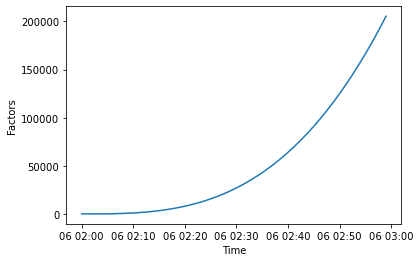

In [ ]:
# graph the relationship between time and factor
plt.plot(times, factors)
plt.xlabel("Time")
plt.ylabel("Factors")

Text(0, 0.5, 'Pi Estimate')

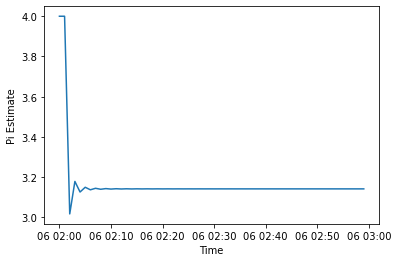

In [ ]:
# graph the relationship between time and pi
plt.plot(times, pis)
plt.xlabel("Time")
plt.ylabel("Pi Estimate")

Text(0, 0.5, 'Pi Estimate')

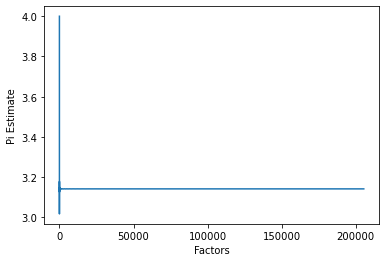

In [ ]:
# graph the relationship between factor and pi
plt.plot(factors, pis)
plt.xlabel("Factors")
plt.ylabel("Pi Estimate")